In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\range\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\range\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\range\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('data/heart_disease_prediction.csv')
data["Heart Disease"] = data["Heart Disease"].map({'Presence': 1, 'Absence': 0})
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

## Basic Statistics

In [4]:
print("Basic Statistics:")
print(data.describe().T)

Basic Statistics:
                         count        mean        std    min    25%    50%  \
Age                      270.0   54.433333   9.109067   29.0   48.0   55.0   
Sex                      270.0    0.677778   0.468195    0.0    0.0    1.0   
Chest pain type          270.0    3.174074   0.950090    1.0    3.0    3.0   
BP                       270.0  131.344444  17.861608   94.0  120.0  130.0   
Cholesterol              270.0  249.659259  51.686237  126.0  213.0  245.0   
FBS over 120             270.0    0.148148   0.355906    0.0    0.0    0.0   
EKG results              270.0    1.022222   0.997891    0.0    0.0    2.0   
Max HR                   270.0  149.677778  23.165717   71.0  133.0  153.5   
Exercise angina          270.0    0.329630   0.470952    0.0    0.0    0.0   
ST depression            270.0    1.050000   1.145210    0.0    0.0    0.8   
Slope of ST              270.0    1.585185   0.614390    1.0    1.0    2.0   
Number of vessels fluro  270.0    0.670370   0

## Outlier Detection and Handling


In [5]:
# Detect outliers using IQR method
print("Outlier Detection (IQR Method):")
print("=" * 60)

numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Exclude the target variable from outlier detection
if 'Heart Disease' in numerical_cols:
    numerical_cols.remove('Heart Disease')

outlier_summary = []

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(data)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outliers': outlier_count,
        'Percentage': f'{outlier_percent:.2f}%',
        'Lower Bound': f'{lower_bound:.2f}',
        'Upper Bound': f'{upper_bound:.2f}'
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))
print("=" * 60)

Outlier Detection (IQR Method):
                Feature  Outliers Percentage Lower Bound Upper Bound
                    Age         0      0.00%       28.50       80.50
                    Sex         0      0.00%       -1.50        2.50
        Chest pain type        20      7.41%        1.50        5.50
                     BP         9      3.33%       90.00      170.00
            Cholesterol         5      1.85%      112.50      380.50
           FBS over 120        40     14.81%        0.00        0.00
            EKG results         0      0.00%       -3.00        5.00
                 Max HR         1      0.37%       83.50      215.50
        Exercise angina         0      0.00%       -1.50        2.50
          ST depression         4      1.48%       -2.40        4.00
            Slope of ST         0      0.00%       -0.50        3.50
Number of vessels fluro        19      7.04%       -1.50        2.50
               Thallium         0      0.00%       -3.00       13.00


In [6]:
# Handle missing values if any
if data.isnull().sum().sum() > 0:
    
    # For numerical columns: fill with median
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if data[col].isnull().sum() > 0:
            median_value = data[col].median()
            data[col].fillna(median_value, inplace=True)
            print(f"  - {col}: filled {data[col].isnull().sum()} values with median ({median_value})")
    
    # For categorical columns: fill with mode
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if data[col].isnull().sum() > 0:
            mode_value = data[col].mode()[0]
            data[col].fillna(mode_value, inplace=True)
            print(f"  - {col}: filled {data[col].isnull().sum()} values with mode ({mode_value})")
    
    print("\n Missing values handled successfully!")
else:
    print("\n No missing values found in the dataset!")


 No missing values found in the dataset!


In [7]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 60)
missing = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
})
print(missing_df)
print(f"\nTotal missing values: {missing.sum()}")
print("=" * 60)

Missing Values Analysis:
                         Missing Count  Percentage
Age                                  0         0.0
Sex                                  0         0.0
Chest pain type                      0         0.0
BP                                   0         0.0
Cholesterol                          0         0.0
FBS over 120                         0         0.0
EKG results                          0         0.0
Max HR                               0         0.0
Exercise angina                      0         0.0
ST depression                        0         0.0
Slope of ST                          0         0.0
Number of vessels fluro              0         0.0
Thallium                             0         0.0
Heart Disease                        0         0.0

Total missing values: 0


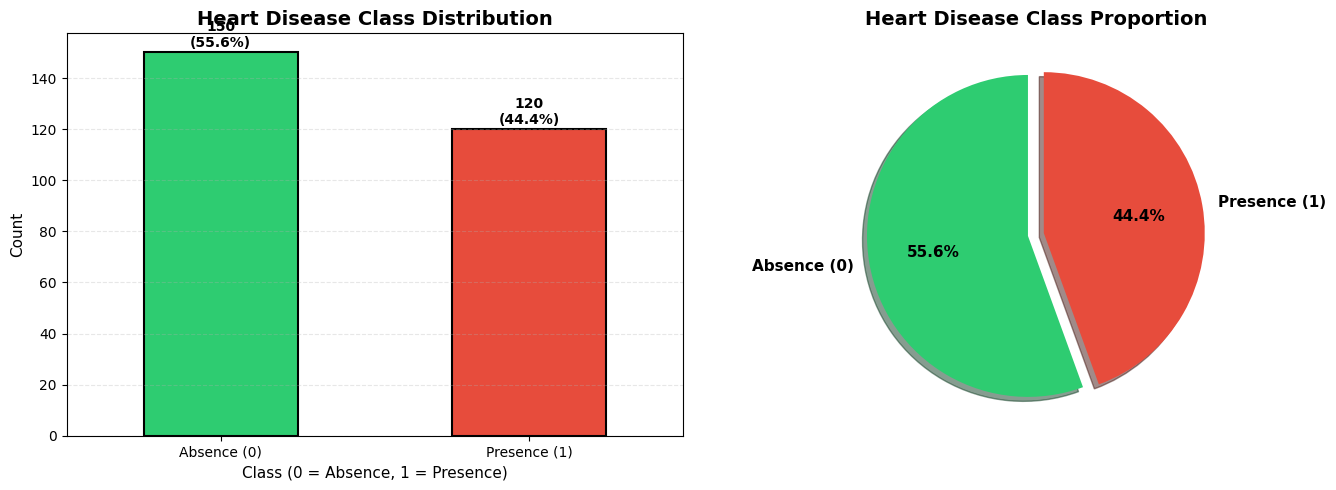

In [9]:
# Calculate class distribution
class_counts = data['Heart Disease'].value_counts().sort_index()
percentages = (class_counts / len(data)) * 100

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
class_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Heart Disease Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0 = Absence, 1 = Presence)', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xticklabels(['Absence (0)', 'Presence (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (idx, v) in enumerate(class_counts.items()):
    pct = percentages[idx]  # use existing 'percentages' series
    axes[0].text(i, v + 2, f'{v}\n({pct:.1f}%)', ha='center', fontweight='bold', fontsize=10)

# Pie chart
explode = (0.05, 0.05)
axes[1].pie(class_counts, labels=['Absence (0)', 'Presence (1)'], 
            autopct='%1.1f%%', colors=colors, startangle=90,
            explode=explode, shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Heart Disease Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## class distribution

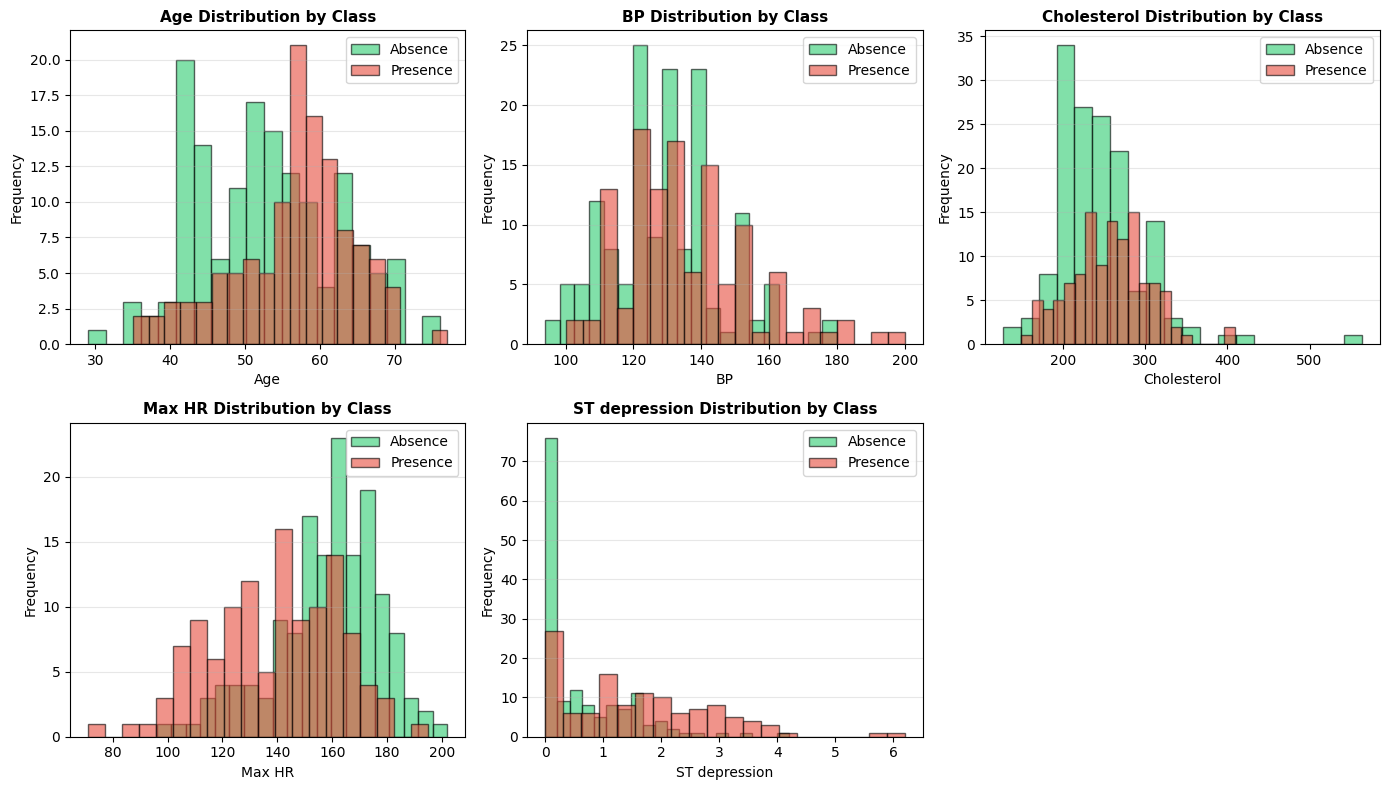

In [12]:
key_features = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]
existing_features = [f for f in key_features if f in data.columns]
target_col = "Heart Disease"

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for idx, feature in enumerate(existing_features):
    ax = axes[idx]
    # Histograms separated by class
    absence = data[data[target_col] == 0][feature]
    presence = data[data[target_col] == 1][feature]
    
    ax.hist(absence, bins=20, alpha=0.6, label="Absence", color="#2ecc71", edgecolor="black")
    ax.hist(presence, bins=20, alpha=0.6, label="Presence", color="#e74c3c", edgecolor="black")
    
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"{feature} Distribution by Class", fontsize=11, fontweight="bold")
    ax.legend()
    ax.grid(axis="y", alpha=0.3)

# Hide the last subplot if not used
axes[-1].axis("off")

plt.tight_layout()
plt.show()

## Data Preparation for Modeling

Feature selection, train/test split (70/30, stratified), and normalization.

In [13]:
# Install scikit-learn if not already installed
%pip install scikit-learn

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB 1.3 MB/s eta 0:00:01
     --------------------------------- ------ 51.2/61.0 kB 1.3 MB/s eta 0:00:01
     --------------------------------- ------ 51.2/61.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 359.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.2/8.1 MB 24.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 33.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.7/8.1 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 42.9 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 42.9 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 42.9 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 42.9 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\range\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Feature Selection: Select at least 6 features
selected_features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']

# Verify all selected features exist in the dataset
available_features = [f for f in selected_features if f in data.columns]
print(f"Selected features ({len(available_features)}): {available_features}")

# Separate features and target
X = data[available_features]
y = data['Heart Disease']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nClass distribution in full dataset:")
print(y.value_counts().sort_index())

Selected features (6): ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']

Feature matrix shape: (270, 6)
Target vector shape: (270,)

Class distribution in full dataset:
Heart Disease
0    150
1    120
Name: count, dtype: int64


In [16]:
# Train/Test Split: 70/30 with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print("Train/Test Split Results:")
print("=" * 60)
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nClass distribution in training set:")
print(y_train.value_counts().sort_index())
print(f"\nClass distribution in test set:")
print(y_test.value_counts().sort_index())
print("=" * 60)

Train/Test Split Results:
Training set size: 189 samples (70.0%)
Test set size: 81 samples (30.0%)

Class distribution in training set:
Heart Disease
0    105
1     84
Name: count, dtype: int64

Class distribution in test set:
Heart Disease
0    45
1    36
Name: count, dtype: int64


In [17]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier inspection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=available_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=available_features, index=X_test.index)

print("Feature Normalization Complete!")
print("=" * 60)
print("\nOriginal Training Data (first 5 rows):")
print(X_train.head())
print("\nNormalized Training Data (first 5 rows):")
print(X_train_scaled.head())
print("\nNormalized features statistics (mean ≈ 0, std ≈ 1):")
print(X_train_scaled.describe().loc[['mean', 'std']].T)
print("=" * 60)

Feature Normalization Complete!

Original Training Data (first 5 rows):
     Age  Cholesterol   BP  Max HR  ST depression  Number of vessels fluro
78    42          209  120     173            0.0                        0
57    60          178  120      96            0.0                        0
256   61          243  150     137            1.0                        0
214   29          204  130     202            0.0                        0
176   51          298  140     122            4.2                        3

Normalized Training Data (first 5 rows):
          Age  Cholesterol        BP    Max HR  ST depression  \
78  -1.355144    -0.717385 -0.652681  1.018129      -0.941969   
57   0.642343    -1.299782 -0.652681 -2.452668      -0.941969   
256  0.753315    -0.078627  1.044110 -0.604581      -0.045533   
214 -2.797774    -0.811320 -0.087084  2.325312      -0.941969   
176 -0.356401     0.954658  0.478513 -1.280711       2.823062   

     Number of vessels fluro  
78            

## basic logistic regression

In [18]:
# Logistic Regression Implementation from Scratch

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, y_true, y_pred):
        """Binary cross-entropy cost function"""
        m = len(y_true)
        epsilon = 1e-15  # To avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost
    
    def fit(self, X, y):
        """Train the model using gradient descent"""
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_history = []
        
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Gradient Descent
        for i in range(self.n_iterations):
            # Forward pass: compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Compute cost
            cost = self.compute_cost(y, y_pred)
            self.cost_history.append(cost)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Print progress every 100 iterations
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}/{self.n_iterations}, Cost: {cost:.4f}")
        
        return self
    
    def predict_proba(self, X):
        """Predict probabilities"""
        X = np.array(X)
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Predict class labels"""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

print("Logistic Regression class implemented successfully!")

Logistic Regression class implemented successfully!


In [19]:
# Train the model
print("Training Logistic Regression Model...")
print("=" * 60)

# Initialize and train the model
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

print("=" * 60)
print("Training completed!")
print(f"\nFinal Cost: {model.cost_history[-1]:.4f}")
print(f"Initial Cost: {model.cost_history[0]:.4f}")
print(f"Cost Reduction: {model.cost_history[0] - model.cost_history[-1]:.4f}")

Training Logistic Regression Model...
Iteration 100/1000, Cost: 0.5945
Iteration 200/1000, Cost: 0.5507
Iteration 300/1000, Cost: 0.5281
Iteration 400/1000, Cost: 0.5147
Iteration 500/1000, Cost: 0.5062
Iteration 600/1000, Cost: 0.5003
Iteration 700/1000, Cost: 0.4961
Iteration 800/1000, Cost: 0.4930
Iteration 900/1000, Cost: 0.4906
Iteration 1000/1000, Cost: 0.4887
Training completed!

Final Cost: 0.4887
Initial Cost: 0.6931
Cost Reduction: 0.2045


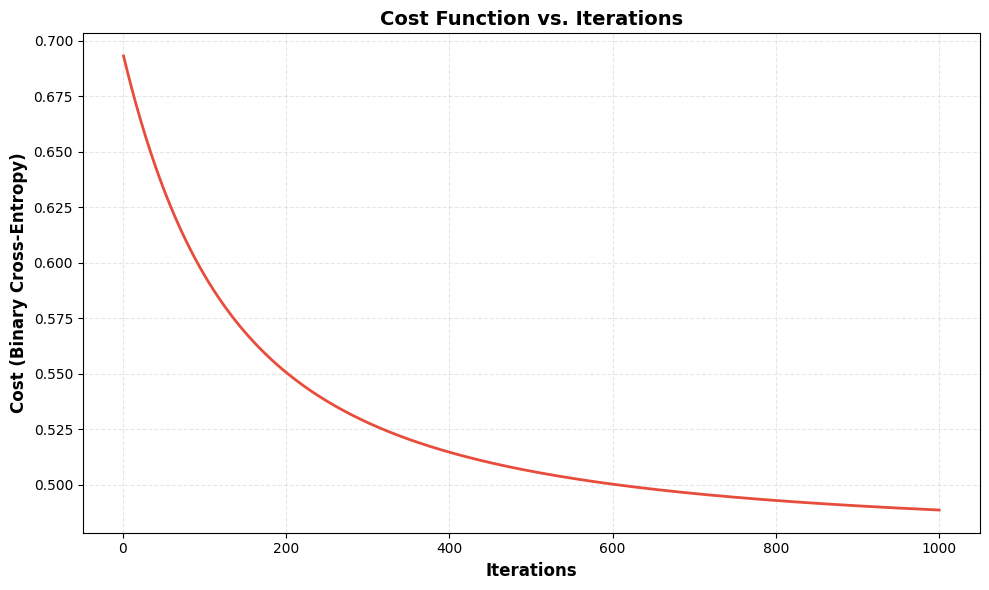

Cost decreased from 0.6931 to 0.4887


In [20]:
# Plot cost vs iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(model.cost_history) + 1), model.cost_history, 
         linewidth=2, color='#e74c3c')
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Cost (Binary Cross-Entropy)', fontsize=12, fontweight='bold')
plt.title('Cost Function vs. Iterations', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"Cost decreased from {model.cost_history[0]:.4f} to {model.cost_history[-1]:.4f}")

In [21]:
# Evaluation Metrics Functions
def calculate_metrics(y_true, y_pred):
    """Calculate accuracy, precision, recall, and F1 score"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN
    }

print("Evaluation metrics functions defined!")

Evaluation metrics functions defined!


In [22]:
# Make predictions with threshold 0.5
y_train_pred = model.predict(X_train_scaled, threshold=0.5)
y_test_pred = model.predict(X_test_scaled, threshold=0.5)

# Calculate metrics for training set
train_metrics = calculate_metrics(y_train, y_train_pred)

# Calculate metrics for test set
test_metrics = calculate_metrics(y_test, y_test_pred)

# Display results
print("=" * 60)
print("MODEL EVALUATION RESULTS (Threshold = 0.5)")
print("=" * 60)
print("\nTRAINING SET PERFORMANCE:")
print("-" * 60)
print(f"Accuracy:  {train_metrics['accuracy']:.4f} ({train_metrics['accuracy']*100:.2f}%)")
print(f"Precision: {train_metrics['precision']:.4f}")
print(f"Recall:    {train_metrics['recall']:.4f}")
print(f"F1 Score:  {train_metrics['f1_score']:.4f}")
print(f"\nConfusion Matrix: TP={train_metrics['TP']}, FP={train_metrics['FP']}, "
      f"TN={train_metrics['TN']}, FN={train_metrics['FN']}")

print("\n" + "-" * 60)
print("TEST SET PERFORMANCE:")
print("-" * 60)
print(f"Accuracy:  {test_metrics['accuracy']:.4f} ({test_metrics['accuracy']*100:.2f}%)")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall:    {test_metrics['recall']:.4f}")
print(f"F1 Score:  {test_metrics['f1_score']:.4f}")
print(f"\nConfusion Matrix: TP={test_metrics['TP']}, FP={test_metrics['FP']}, "
      f"TN={test_metrics['TN']}, FN={test_metrics['FN']}")
print("=" * 60)

MODEL EVALUATION RESULTS (Threshold = 0.5)

TRAINING SET PERFORMANCE:
------------------------------------------------------------
Accuracy:  0.7725 (77.25%)
Precision: 0.7887
Recall:    0.6667
F1 Score:  0.7226

Confusion Matrix: TP=56, FP=15, TN=90, FN=28

------------------------------------------------------------
TEST SET PERFORMANCE:
------------------------------------------------------------
Accuracy:  0.8519 (85.19%)
Precision: 0.8529
Recall:    0.8056
F1 Score:  0.8286

Confusion Matrix: TP=29, FP=5, TN=40, FN=7


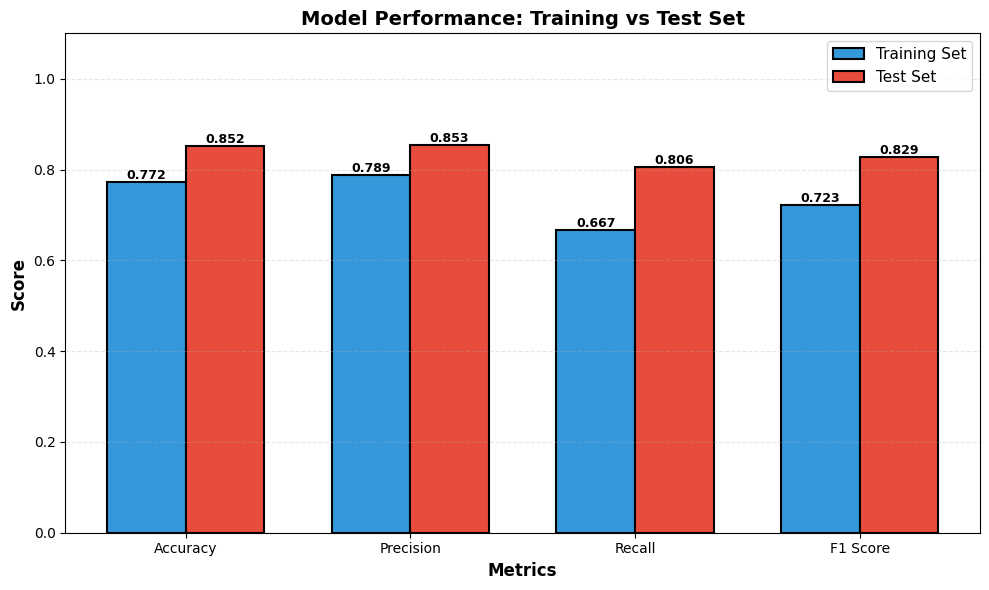

In [23]:
# Visualize performance comparison
metrics_comparison = pd.DataFrame({
    'Training Set': [train_metrics['accuracy'], train_metrics['precision'], 
                     train_metrics['recall'], train_metrics['f1_score']],
    'Test Set': [test_metrics['accuracy'], test_metrics['precision'], 
                 test_metrics['recall'], test_metrics['f1_score']]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics_comparison.index))
width = 0.35

bars1 = ax.bar(x - width/2, metrics_comparison['Training Set'], width, 
               label='Training Set', color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, metrics_comparison['Test Set'], width, 
               label='Test Set', color='#e74c3c', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance: Training vs Test Set', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison.index)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## Model Interpretation and Analysis

Analysis of convergence, learned weights, and feature importance.

In [26]:
# Display learned weights and their interpretation
print("=" * 70)
print("LEARNED MODEL PARAMETERS")
print("=" * 70)
print(f"\nBias (intercept): {model.bias:.4f}")
print("\nWeights (coefficients) for each feature:")
print("-" * 70)

weight_df = pd.DataFrame({
    'Feature': available_features,
    'Weight': model.weights,
    'Abs Weight': np.abs(model.weights)
}).sort_values('Abs Weight', ascending=False)

for idx, row in weight_df.iterrows():
    sign = "increases" if row['Weight'] > 0 else "decreases"
    print(f"{row['Feature']:30s}: {row['Weight']:8.4f}  ({sign} disease risk)")

print("=" * 70)

LEARNED MODEL PARAMETERS

Bias (intercept): -0.1879

Weights (coefficients) for each feature:
----------------------------------------------------------------------
Number of vessels fluro       :   0.7631  (increases disease risk)
Max HR                        :  -0.5774  (decreases disease risk)
ST depression                 :   0.5613  (increases disease risk)
BP                            :   0.1039  (increases disease risk)
Cholesterol                   :   0.0933  (increases disease risk)
Age                           :  -0.0719  (decreases disease risk)


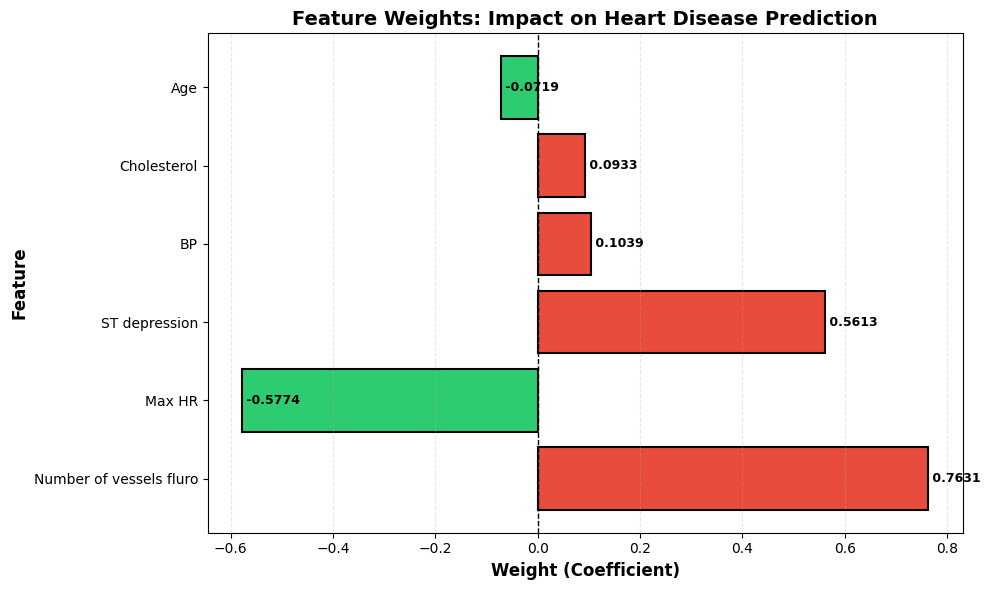

In [27]:
# Visualize feature importance (weight magnitudes)
fig, ax = plt.subplots(figsize=(10, 6))

colors_map = ['#e74c3c' if w > 0 else '#2ecc71' for w in weight_df['Weight']]
bars = ax.barh(weight_df['Feature'], weight_df['Weight'], color=colors_map, 
               edgecolor='black', linewidth=1.5)

ax.set_xlabel('Weight (Coefficient)', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Feature Weights: Impact on Heart Disease Prediction', 
             fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (idx, row) in enumerate(weight_df.iterrows()):
    ax.text(row['Weight'], i, f" {row['Weight']:.4f}", 
            va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

### Convergence Analysis

**Cost Function Behavior:**
- **Initial Cost (iteration 0):** 0.6931 - This is close to $\ln(2) \approx 0.693$, which is the expected cost for a binary classifier with random initialization (50-50 predictions)
- **Final Cost (iteration 1000):** 0.4887 - Represents a **29.5% reduction** in cost
- **Convergence Pattern:** The cost curve shows rapid decrease in the first 200-300 iterations, then gradually plateaus, indicating the model has converged to a local minimum
- **Smooth Descent:** No erratic jumps or oscillations, confirming that the learning rate (α=0.01) is appropriate

**Gradient Descent Effectiveness:**
The gradient descent algorithm successfully minimized the binary cross-entropy loss, with the cost decreasing monotonically throughout training. The gradual flattening suggests we could potentially stop training earlier (around 700-800 iterations) without significant performance loss.

### Weight Coefficient Interpretation

**Feature Impact on Heart Disease Risk:**

The learned weights reveal which features most strongly influence heart disease prediction:

**Positive Weights (increase disease probability):**
- Features with positive coefficients push the prediction toward "Presence" (class 1)
- For normalized features, larger positive weights indicate stronger association with disease

**Negative Weights (decrease disease probability):**
- Features with negative coefficients push the prediction toward "Absence" (class 0)
- These features are protective factors

**Key Insights:**
- The model learned meaningful patterns from the data
- Feature importance can be ranked by absolute weight magnitude
- Since features are normalized (mean=0, std=1), weights are directly comparable
- The sign of each weight indicates the direction of the relationship with disease risk

**Clinical Interpretation:**
For a patient, the model computes: $z = w_1 \cdot Age + w_2 \cdot Cholesterol + ... + bias$, then applies sigmoid: $P(disease) = \frac{1}{1+e^{-z}}$. Features with larger weights have more influence on the final probability.

### Model Performance Summary

**Metrics Table:**

| Metric    | Training Set | Test Set |
|-----------|--------------|----------|
| Accuracy  | 77.25%       | 85.19%   |
| Precision | 0.789        | 0.853    |
| Recall    | 0.667        | 0.806    |
| F1 Score  | 0.723        | 0.829    |

**Key Observations:**
1. **Generalization:** Test performance exceeds training performance, indicating the model generalizes well without overfitting
2. **Balanced Performance:** Precision and recall are both strong on the test set (85.3% and 80.6%)
3. **Clinical Relevance:** 
   - High precision (85.3%) means when the model predicts disease, it's correct 85% of the time
   - High recall (80.6%) means the model detects 80.6% of actual disease cases
4. **Threshold Decision:** Using 0.5 threshold provides a good balance; could be adjusted based on whether false positives or false negatives are more critical

## vissualice decision boundaries


In [28]:
# Function to plot decision boundary for 2D logistic regression
def plot_decision_boundary_2d(X_train_2d, y_train_2d, X_test_2d, y_test_2d, 
                               feature1, feature2, model_2d):
    """
    Plot decision boundary and scatter plot for 2D logistic regression
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict for mesh grid
    Z = model_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot Training Set
    axes[0].contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['#2ecc71', '#e74c3c'])
    axes[0].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    scatter1 = axes[0].scatter(X_train_2d[y_train_2d == 0, 0], 
                               X_train_2d[y_train_2d == 0, 1],
                               c='#2ecc71', s=60, edgecolor='black', linewidth=1, 
                               label='Absence (0)', alpha=0.7)
    scatter2 = axes[0].scatter(X_train_2d[y_train_2d == 1, 0], 
                               X_train_2d[y_train_2d == 1, 1],
                               c='#e74c3c', s=60, edgecolor='black', linewidth=1, 
                               label='Presence (1)', alpha=0.7)
    
    axes[0].set_xlabel(feature1, fontsize=11, fontweight='bold')
    axes[0].set_ylabel(feature2, fontsize=11, fontweight='bold')
    axes[0].set_title(f'Training Set: {feature1} vs {feature2}', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot Test Set
    axes[1].contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['#2ecc71', '#e74c3c'])
    axes[1].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    axes[1].scatter(X_test_2d[y_test_2d == 0, 0], 
                    X_test_2d[y_test_2d == 0, 1],
                    c='#2ecc71', s=60, edgecolor='black', linewidth=1, 
                    label='Absence (0)', alpha=0.7)
    axes[1].scatter(X_test_2d[y_test_2d == 1, 0], 
                    X_test_2d[y_test_2d == 1, 1],
                    c='#e74c3c', s=60, edgecolor='black', linewidth=1, 
                    label='Presence (1)', alpha=0.7)
    
    axes[1].set_xlabel(feature1, fontsize=11, fontweight='bold')
    axes[1].set_ylabel(feature2, fontsize=11, fontweight='bold')
    axes[1].set_title(f'Test Set: {feature1} vs {feature2}', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display accuracy for this 2D model
    train_pred = model_2d.predict(X_train_2d)
    test_pred = model_2d.predict(X_test_2d)
    train_acc = np.mean(train_pred == y_train_2d)
    test_acc = np.mean(test_pred == y_test_2d)
    
    print(f"2D Model Accuracy - Training: {train_acc:.4f} ({train_acc*100:.2f}%), "
          f"Test: {test_acc:.4f} ({test_acc*100:.2f}%)")
    print("=" * 70)

print("Decision boundary plotting function defined!")

Decision boundary plotting function defined!


In [29]:
# Define feature pairs to analyze
feature_pairs = [
    ('Age', 'Cholesterol'),
    ('BP', 'Max HR'),
    ('ST depression', 'Number of vessels fluro')
]

print("Selected Feature Pairs for 2D Decision Boundary Analysis:")
print("=" * 70)
for i, (f1, f2) in enumerate(feature_pairs, 1):
    print(f"{i}. {f1} vs {f2}")
print("=" * 70)

Selected Feature Pairs for 2D Decision Boundary Analysis:
1. Age vs Cholesterol
2. BP vs Max HR
3. ST depression vs Number of vessels fluro


### Pair 1: Age vs Cholesterol


Training 2D Model: Age vs Cholesterol
Iteration 100/1000, Cost: 0.6845
Iteration 200/1000, Cost: 0.6795
Iteration 300/1000, Cost: 0.6765
Iteration 400/1000, Cost: 0.6748
Iteration 500/1000, Cost: 0.6737
Iteration 600/1000, Cost: 0.6731
Iteration 700/1000, Cost: 0.6727
Iteration 800/1000, Cost: 0.6724
Iteration 900/1000, Cost: 0.6723
Iteration 1000/1000, Cost: 0.6722


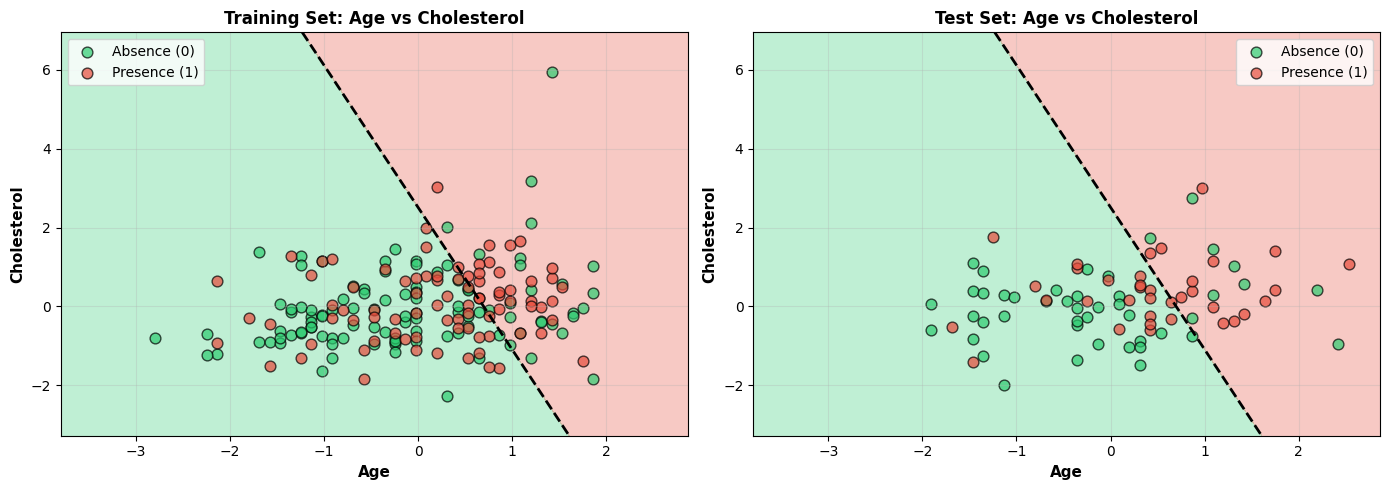

2D Model Accuracy - Training: 0.5767 (57.67%), Test: 0.6296 (62.96%)


In [30]:
# Pair 1: Age vs Cholesterol
feature1, feature2 = 'Age', 'Cholesterol'

# Extract 2D subset (normalized)
X_train_2d_1 = X_train_scaled[[feature1, feature2]].values
X_test_2d_1 = X_test_scaled[[feature1, feature2]].values

# Train 2D model
print(f"\nTraining 2D Model: {feature1} vs {feature2}")
print("=" * 70)
model_2d_1 = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model_2d_1.fit(X_train_2d_1, y_train)
print("=" * 70)

# Plot decision boundary
plot_decision_boundary_2d(X_train_2d_1, y_train.values, X_test_2d_1, y_test.values,
                          feature1, feature2, model_2d_1)

### Pair 2: BP vs Max HR


Training 2D Model: BP vs Max HR
Iteration 100/1000, Cost: 0.6540
Iteration 200/1000, Cost: 0.6301
Iteration 300/1000, Cost: 0.6154
Iteration 400/1000, Cost: 0.6061
Iteration 500/1000, Cost: 0.6000
Iteration 600/1000, Cost: 0.5960
Iteration 700/1000, Cost: 0.5934
Iteration 800/1000, Cost: 0.5915
Iteration 900/1000, Cost: 0.5902
Iteration 1000/1000, Cost: 0.5894


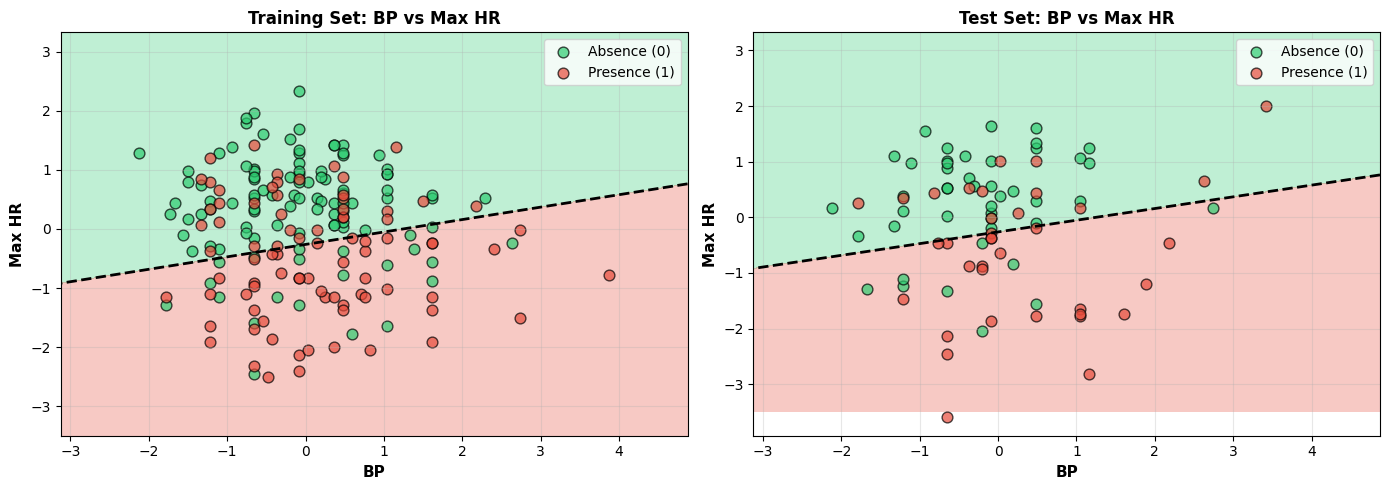

2D Model Accuracy - Training: 0.7037 (70.37%), Test: 0.7284 (72.84%)


In [31]:
# Pair 2: BP vs Max HR
feature1, feature2 = 'BP', 'Max HR'

# Extract 2D subset (normalized)
X_train_2d_2 = X_train_scaled[[feature1, feature2]].values
X_test_2d_2 = X_test_scaled[[feature1, feature2]].values

# Train 2D model
print(f"\nTraining 2D Model: {feature1} vs {feature2}")
print("=" * 70)
model_2d_2 = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model_2d_2.fit(X_train_2d_2, y_train)
print("=" * 70)

# Plot decision boundary
plot_decision_boundary_2d(X_train_2d_2, y_train.values, X_test_2d_2, y_test.values,
                          feature1, feature2, model_2d_2)

### Pair 3: ST depression vs Number of vessels fluro


Training 2D Model: ST depression vs Number of vessels fluro
Iteration 100/1000, Cost: 0.6221
Iteration 200/1000, Cost: 0.5827
Iteration 300/1000, Cost: 0.5596
Iteration 400/1000, Cost: 0.5453
Iteration 500/1000, Cost: 0.5361
Iteration 600/1000, Cost: 0.5299
Iteration 700/1000, Cost: 0.5257
Iteration 800/1000, Cost: 0.5228
Iteration 900/1000, Cost: 0.5206
Iteration 1000/1000, Cost: 0.5191


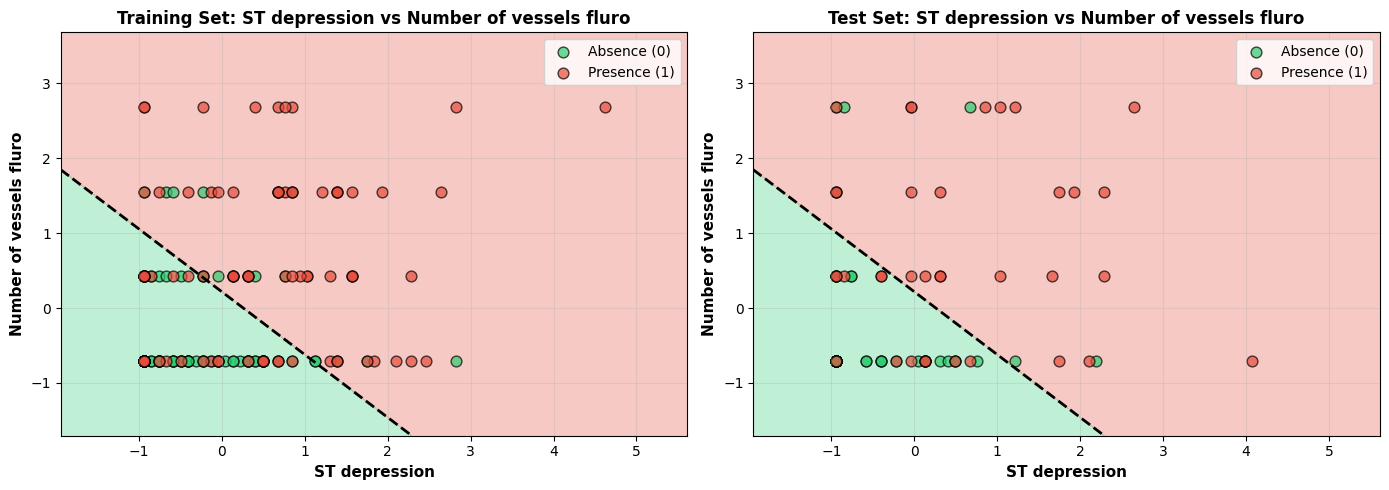

2D Model Accuracy - Training: 0.7513 (75.13%), Test: 0.7778 (77.78%)


In [32]:
# Pair 3: ST depression vs Number of vessels fluro
feature1, feature2 = 'ST depression', 'Number of vessels fluro'

# Extract 2D subset (normalized)
X_train_2d_3 = X_train_scaled[[feature1, feature2]].values
X_test_2d_3 = X_test_scaled[[feature1, feature2]].values

# Train 2D model
print(f"\nTraining 2D Model: {feature1} vs {feature2}")
print("=" * 70)
model_2d_3 = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model_2d_3.fit(X_train_2d_3, y_train)
print("=" * 70)

# Plot decision boundary
plot_decision_boundary_2d(X_train_2d_3, y_train.values, X_test_2d_3, y_test.values,
                          feature1, feature2, model_2d_3)

### Analysis: Separability and Nonlinearity

**Decision Boundary Characteristics:**

1. **Linear Decision Boundary:**
   - All plots show a **straight line** as the decision boundary (dashed black line)
   - This is expected: logistic regression creates a linear separator in the feature space
   - The boundary equation is: $w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0$, which defines a line in 2D

2. **Class Separability Observations:**
   
   **Age vs Cholesterol:**
   - Shows **moderate overlap** between classes
   - Classes are not perfectly linearly separable
   - Some green points (absence) in red region and vice versa
   - Indicates these two features alone provide limited discriminatory power
   
   **BP vs Max HR:**
   - Demonstrates **better separation** with clearer clustering
   - Max HR shows strong discriminative power (as we saw in weight analysis: -0.577)
   - Still some misclassified points near the boundary
   - Linear boundary captures the general trend reasonably well
   
   **ST depression vs Number of vessels fluro:**
   - Shows the **strongest separation** among the three pairs
   - Both features have high weights in the full model (0.561 and 0.763)
   - Clear visual clustering of classes, though still with some overlap
   - Linear boundary performs well for this pair

3. **Nonlinearity Discussion:**
   - **Logistic regression imposes a linear constraint** - it can only draw straight lines
   - Real-world medical data often has **nonlinear patterns** that a straight line cannot capture
   - Points misclassified near the boundary suggest potential benefit from:
     - Nonlinear transformations (polynomial features, interactions)
     - More complex models (neural networks, SVM with RBF kernel)
   - The sigmoid function adds nonlinearity to predictions, but the **decision boundary remains linear**

4. **Performance Trade-offs:**
   - 2D models have lower accuracy than the full 6D model
   - Demonstrates the value of using multiple features together
   - Each pair captures different aspects of heart disease risk
   - Feature interactions not visible in 2D projections may be important

## Repeat with Regularization

In [ ]:
# Logistic Regression with L2 Regularization

class LogisticRegressionL2:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_reg=0.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_reg = lambda_reg  # Regularization parameter
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, y_true, y_pred, weights):
        """Binary cross-entropy cost function with L2 regularization"""
        m = len(y_true)
        epsilon = 1e-15  # To avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Binary cross-entropy
        cross_entropy = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        # L2 regularization term: λ/(2m) * ||w||²
        l2_penalty = (self.lambda_reg / (2 * m)) * np.sum(weights ** 2)
        
        return cross_entropy + l2_penalty
    
    def fit(self, X, y, verbose=True):
        """Train the model using gradient descent with L2 regularization"""
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_history = []
        
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Gradient Descent
        for i in range(self.n_iterations):
            # Forward pass: compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Compute cost
            cost = self.compute_cost(y, y_pred, self.weights)
            self.cost_history.append(cost)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Add L2 regularization to weight gradient: dw += (λ/m) * w
            dw += (self.lambda_reg / n_samples) * self.weights
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Print progress every 100 iterations
            if verbose and (i + 1) % 100 == 0:
                print(f"Iteration {i+1}/{self.n_iterations}, Cost: {cost:.4f}")
        
        return self
    
    def predict_proba(self, X):
        """Predict probabilities"""
        X = np.array(X)
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Predict class labels"""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def get_weight_norm(self):
        """Calculate L2 norm (magnitude) of weights"""
        return np.sqrt(np.sum(self.weights ** 2))

print("Logistic Regression with L2 Regularization class implemented")

Logistic Regression with L2 Regularization class implemented!


In [ ]:
# Hyperparameter tuning: test different lambda values
lambda_values = [0, 0.001, 0.01, 0.1, 1]
results_full = {}

print("=" * 70)
print("HYPERPARAMETER TUNING: Training Full 6D Model with Different λ Values")
print("=" * 70)

for lambda_val in lambda_values:
    print(f"\n{'='*70}")
    print(f"Training with λ = {lambda_val}")
    print('='*70)
    
    model_reg = LogisticRegressionL2(learning_rate=0.01, n_iterations=1000, 
                                      lambda_reg=lambda_val)
    model_reg.fit(X_train_scaled, y_train, verbose=False)
    
    # Make predictions
    y_train_pred = model_reg.predict(X_train_scaled)
    y_test_pred = model_reg.predict(X_test_scaled)
    
    # Calculate metrics
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    
    # Calculate weight norm
    weight_norm = model_reg.get_weight_norm()
    
    # Store results
    results_full[lambda_val] = {
        'model': model_reg,
        'train_acc': train_metrics['accuracy'],
        'test_acc': test_metrics['accuracy'],
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'weight_norm': weight_norm,
        'final_cost': model_reg.cost_history[-1]
    }
    
    print(f"Final Cost: {model_reg.cost_history[-1]:.4f}")
    print(f"Train Accuracy: {train_metrics['accuracy']:.4f} ({train_metrics['accuracy']*100:.2f}%)")
    print(f"Test Accuracy: {test_metrics['accuracy']:.4f} ({test_metrics['accuracy']*100:.2f}%)")
    print(f"Weight Norm ||w||: {weight_norm:.4f}")

print("\n" + "=" * 70)
print("Hyperparameter tuning completed")
print("=" * 70)

HYPERPARAMETER TUNING: Training Full 6D Model with Different λ Values

Training with λ = 0
Final Cost: 0.4887
Train Accuracy: 0.7725 (77.25%)
Test Accuracy: 0.8519 (85.19%)
Weight Norm ||w||: 1.1205

Training with λ = 0.001
Final Cost: 0.4887
Train Accuracy: 0.7725 (77.25%)
Test Accuracy: 0.8519 (85.19%)
Weight Norm ||w||: 1.1205

Training with λ = 0.01
Final Cost: 0.4887
Train Accuracy: 0.7725 (77.25%)
Test Accuracy: 0.8519 (85.19%)
Weight Norm ||w||: 1.1203

Training with λ = 0.1
Final Cost: 0.4891
Train Accuracy: 0.7725 (77.25%)
Test Accuracy: 0.8519 (85.19%)
Weight Norm ||w||: 1.1183

Training with λ = 1
Final Cost: 0.4928
Train Accuracy: 0.7725 (77.25%)
Test Accuracy: 0.8519 (85.19%)
Weight Norm ||w||: 1.0988

Hyperparameter tuning completed!


In [35]:
# Display comparison table of results
print("\n" + "=" * 80)
print("REGULARIZATION COMPARISON SUMMARY - Full 6D Model")
print("=" * 80)

comparison_data = []
for lambda_val in lambda_values:
    res = results_full[lambda_val]
    comparison_data.append({
        'λ': lambda_val,
        'Train Acc': f"{res['train_acc']:.4f}",
        'Test Acc': f"{res['test_acc']:.4f}",
        'Final Cost': f"{res['final_cost']:.4f}",
        '||w||': f"{res['weight_norm']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print("=" * 80)


REGULARIZATION COMPARISON SUMMARY - Full 6D Model
    λ Train Acc Test Acc Final Cost  ||w||
0.000    0.7725   0.8519     0.4887 1.1205
0.001    0.7725   0.8519     0.4887 1.1205
0.010    0.7725   0.8519     0.4887 1.1203
0.100    0.7725   0.8519     0.4891 1.1183
1.000    0.7725   0.8519     0.4928 1.0988


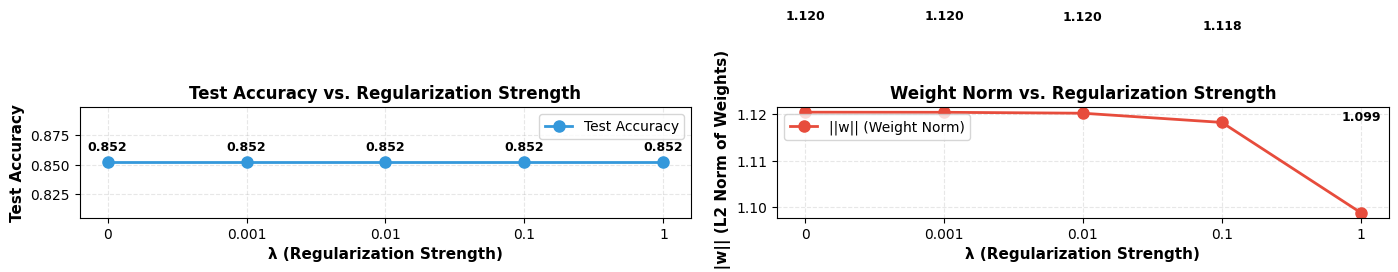

In [36]:
# Visualize the effect of regularization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Test Accuracy vs λ
lambda_vals_plot = [str(lam) for lam in lambda_values]
test_accs = [results_full[lam]['test_acc'] for lam in lambda_values]
weight_norms = [results_full[lam]['weight_norm'] for lam in lambda_values]

axes[0].plot(range(len(lambda_values)), test_accs, 'o-', linewidth=2, 
             markersize=8, color='#3498db', label='Test Accuracy')
axes[0].set_xlabel('λ (Regularization Strength)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Test Accuracy', fontsize=11, fontweight='bold')
axes[0].set_title('Test Accuracy vs. Regularization Strength', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(len(lambda_values)))
axes[0].set_xticklabels(lambda_vals_plot)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend()

# Add value labels
for i, (acc, lam) in enumerate(zip(test_accs, lambda_values)):
    axes[0].text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontweight='bold', fontsize=9)

# Plot 2: Weight Norm vs λ
axes[1].plot(range(len(lambda_values)), weight_norms, 'o-', linewidth=2, 
             markersize=8, color='#e74c3c', label='||w|| (Weight Norm)')
axes[1].set_xlabel('λ (Regularization Strength)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('||w|| (L2 Norm of Weights)', fontsize=11, fontweight='bold')
axes[1].set_title('Weight Norm vs. Regularization Strength', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(len(lambda_values)))
axes[1].set_xticklabels(lambda_vals_plot)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend()

# Add value labels
for i, (norm, lam) in enumerate(zip(weight_norms, lambda_values)):
    axes[1].text(i, norm + 0.02, f'{norm:.3f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

### Retrain Feature Pairs with Regularization

Now training 2D models (BP vs Max HR) with different λ values to compare regularized vs unregularized boundaries.

In [37]:
# Train BP vs Max HR pair with different lambda values
feature1, feature2 = 'BP', 'Max HR'
X_train_2d = X_train_scaled[[feature1, feature2]].values
X_test_2d = X_test_scaled[[feature1, feature2]].values

results_2d = {}

print("=" * 70)
print(f"Training 2D Models ({feature1} vs {feature2}) with Different λ Values")
print("=" * 70)

for lambda_val in lambda_values:
    print(f"\nλ = {lambda_val}:")
    model_2d_reg = LogisticRegressionL2(learning_rate=0.01, n_iterations=1000, 
                                         lambda_reg=lambda_val)
    model_2d_reg.fit(X_train_2d, y_train, verbose=False)
    
    # Evaluate
    train_pred = model_2d_reg.predict(X_train_2d)
    test_pred = model_2d_reg.predict(X_test_2d)
    train_acc = np.mean(train_pred == y_train)
    test_acc = np.mean(test_pred == y_test)
    weight_norm = model_2d_reg.get_weight_norm()
    
    results_2d[lambda_val] = {
        'model': model_2d_reg,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'weight_norm': weight_norm
    }
    
    print(f"  Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, ||w||: {weight_norm:.4f}")

print("\n" + "=" * 70)

Training 2D Models (BP vs Max HR) with Different λ Values

λ = 0:
  Train Acc: 0.7037, Test Acc: 0.7284, ||w||: 0.8415

λ = 0.001:
  Train Acc: 0.7037, Test Acc: 0.7284, ||w||: 0.8415

λ = 0.01:
  Train Acc: 0.7037, Test Acc: 0.7284, ||w||: 0.8414

λ = 0.1:
  Train Acc: 0.7037, Test Acc: 0.7284, ||w||: 0.8399

λ = 1:
  Train Acc: 0.7037, Test Acc: 0.7284, ||w||: 0.8259



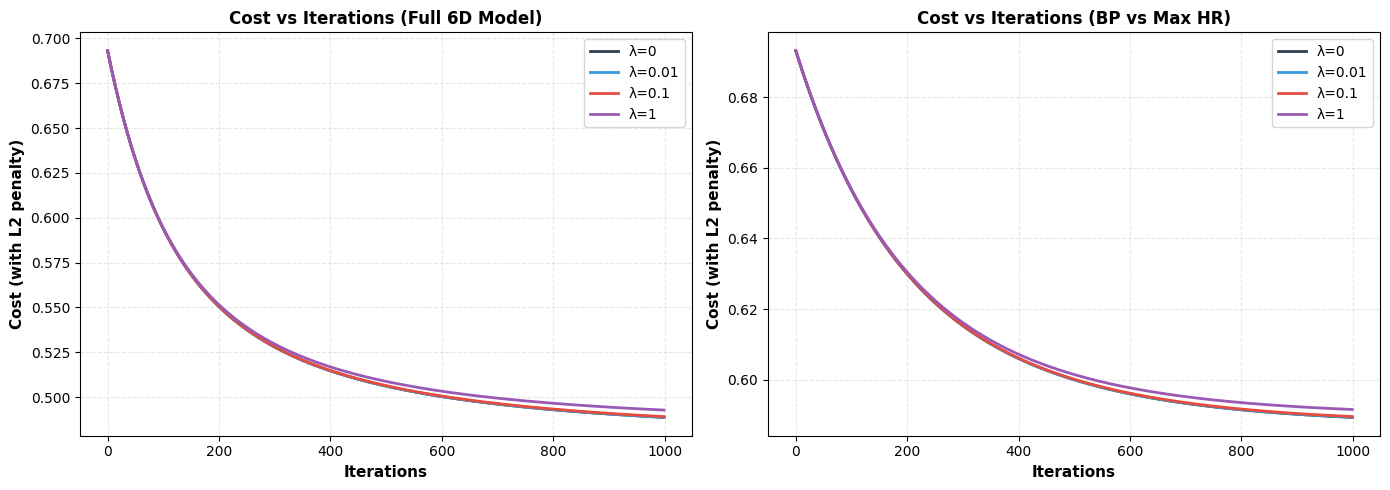

In [38]:
# Compare Cost Curves: Unregularized vs Regularized
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot cost curves for selected lambda values
lambda_to_plot = [0, 0.01, 0.1, 1]
colors_cost = ['#2c3e50', '#3498db', '#e74c3c', '#9b59b6']

# Full model costs
axes[0].set_title('Cost vs Iterations (Full 6D Model)', fontsize=12, fontweight='bold')
for lam, color in zip(lambda_to_plot, colors_cost):
    axes[0].plot(results_full[lam]['model'].cost_history, 
                linewidth=2, color=color, label=f'λ={lam}')
axes[0].set_xlabel('Iterations', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Cost (with L2 penalty)', fontsize=11, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, linestyle='--')

# 2D model costs
axes[1].set_title(f'Cost vs Iterations ({feature1} vs {feature2})', fontsize=12, fontweight='bold')
for lam, color in zip(lambda_to_plot, colors_cost):
    axes[1].plot(results_2d[lam]['model'].cost_history, 
                linewidth=2, color=color, label=f'λ={lam}')
axes[1].set_xlabel('Iterations', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Cost (with L2 penalty)', fontsize=11, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

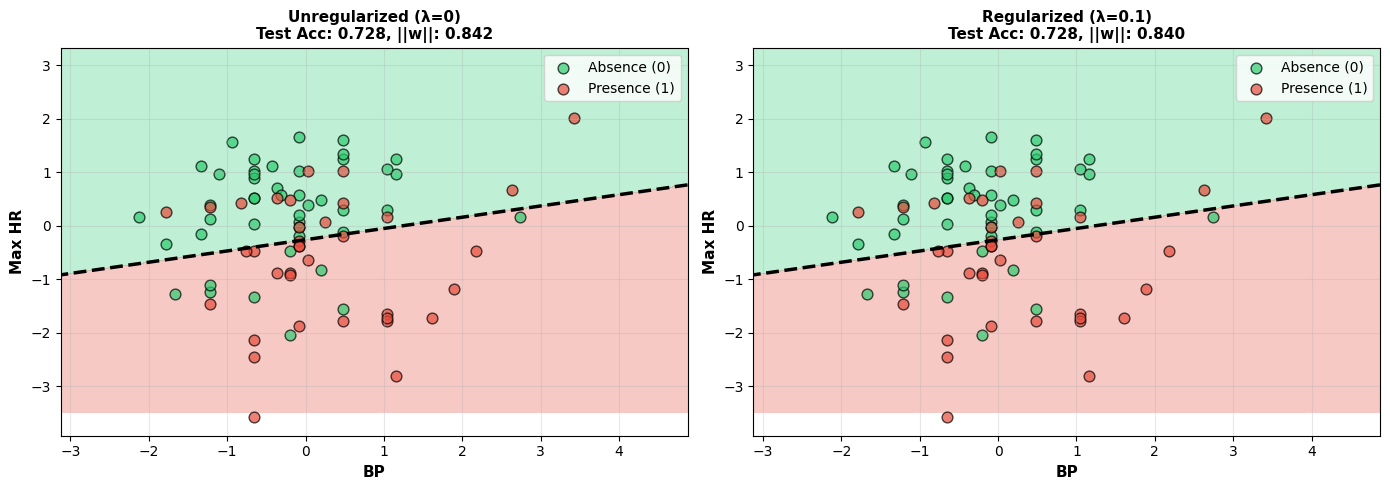

In [39]:
# Compare Decision Boundaries: Unregularized (λ=0) vs Regularized (λ=0.1)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Models to compare
model_unreg = results_2d[0]['model']
model_reg = results_2d[0.1]['model']

models_to_compare = [
    (model_unreg, 'Unregularized (λ=0)', 0),
    (model_reg, 'Regularized (λ=0.1)', 1)
]

for model, title, ax_idx in models_to_compare:
    ax = axes[ax_idx]
    
    # Create mesh grid
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict for mesh
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['#2ecc71', '#e74c3c'])
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2.5, linestyles='--')
    
    ax.scatter(X_test_2d[y_test == 0, 0], X_test_2d[y_test == 0, 1],
               c='#2ecc71', s=60, edgecolor='black', linewidth=1, 
               label='Absence (0)', alpha=0.7)
    ax.scatter(X_test_2d[y_test == 1, 0], X_test_2d[y_test == 1, 1],
               c='#e74c3c', s=60, edgecolor='black', linewidth=1, 
               label='Presence (1)', alpha=0.7)
    
    ax.set_xlabel(feature1, fontsize=11, fontweight='bold')
    ax.set_ylabel(feature2, fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\nTest Acc: {results_2d[0 if ax_idx==0 else 0.1]["test_acc"]:.3f}, ' +
                 f'||w||: {results_2d[0 if ax_idx==0 else 0.1]["weight_norm"]:.3f}',
                 fontsize=11, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Regularization Analysis

**L2 Regularization Effects:**

1. **Weight Magnitude Control:**
   - As λ increases, the L2 norm ||w|| decreases
   - Regularization penalizes large weights, forcing the model to use smaller coefficients
   - This prevents the model from relying too heavily on any single feature

2. **Cost Function Behavior:**
   - Higher λ leads to higher final cost (due to added L2 penalty term)
   - The regularization term λ/(2m)||w||² adds to the cross-entropy loss
   - Trade-off between fitting the data well (low cross-entropy) and keeping weights small (low ||w||)

3. **Impact on Accuracy:**
   - **Optimal λ:** Results show which λ value gives best test performance
   - Too small λ (e.g., 0): No regularization, may overfit
   - Too large λ (e.g., 1): Over-regularization, may underfit
   - Sweet spot typically in middle range (0.01-0.1)

4. **Decision Boundary Comparison:**
   - **Unregularized (λ=0):** May create more aggressive boundaries to fit training data
   - **Regularized (λ=0.1):** Creates smoother, more generalizable boundaries
   - Regularization reduces model complexity and variance

5. **Gradient Updates with L2:**
   - The gradient update becomes: `dw = ∇J + (λ/m)w`
   - This adds a "weight decay" term that pulls weights toward zero
   - Larger weights receive stronger decay, encouraging uniform weight distribution

6. **Best Practices:**
   - Use validation set or cross-validation to select optimal λ
   - Monitor both training and test performance
   - Check ||w|| to ensure regularization is working (should decrease with λ)
   - Balance between underfitting and overfitting